In [1]:
import networkx as nx
from scipy.sparse import linalg as scp_sla
import numpy as np
import matplotlib.pyplot as plt

import sim_lib.util as util
import sim_lib.graph_networkx as gnx
import sim_lib.attr_lib.util as attr_util
from sim_lib.attr_lib.formation import *
import sim_lib.attr_lib.vis as vis

In [2]:
_N = 1

params = {
    'context_count' : 8,
    'k' : 8,
    'attr_func' : attr_util.discrete_pareto_val, # attribute assignment function
    'edge_util_func' : attr_util.max_inv_frequency,
    'edge_proposal' : attr_util.const_one,
    'vtx_util' : attr_util.logistic,
    'edge_selection' : attr_util.seq_projection_edge_edit,
    'attr_copy' : attr_util.freq_attr_copy,
    'seed_type' : 'clique', # Type of seed network
    'max_clique_size' : 10,
    'vtx_types' :
        {
            'wide' : { 'likelihood' : 1.0,
                      'struct_util' : attr_util.degree_util,
                      'color' : 'blue' },
            'tall' : { 'likelihood' : 0.0,
                      'struct_util' : attr_util.potential_density,
                      'color' : 'red' }
        }
}

assert sum([ t['likelihood'] for t in params['vtx_types'].values() ]) == 1.0

In [3]:
def graph_density(G):
    denum = (G.num_people * (G.num_people - 1))
    num = sum([ v.degree for v in G.vertices])
    return num / denum

def second_eigv(G_nx):
    laplacian = nx.linalg.laplacianmatrix.normalized_laplacian_matrix(G_nx)
    eigvals = scp_sla.eigs(laplacian.toarray(), return_eigenvectors=False)
    eigvals.sort()
    return eigvals[1]

def apl(G_nx):
    return nx.average_shortest_path_length(G_nx)

def diam(G_nx):
    return nx.diameter(G_nx)

def social_edge_welfare(G):
    return sum([ v.total_edge_util for v in G.vertices ]) / 2

def modularity(G_nx):
    partitions = nx_comm.greedy_modularity_communities(G_nx)
    return nx_comm.modularity(G_nx, partitions)

def print_metrics(G):
    G_nx = gnx.graph_to_nx(G)
    G_nx_largest = G_nx.subgraph(max(nx.connected_components(G_nx), key=len))
    
    largest_size = len(G_nx_largest)
    gd = graph_density(G)
    avg_pl = apl(G_nx_largest)
    diameter = diam(G_nx_largest)
    eig2 = second_eigv(G_nx_largest)
    
    print(f"""Largest component size: {largest_size}
graph density: {gd}, \n
average path length: {avg_pl}, \n
diameter: {diameter}, \n
second eigenvalue: {eig2} \n""")

In [4]:
def plot_distributions(G):
    
    # Degree distribution
    degree_dist = [ v.degree for v in G.vertices ]
    norm_degree_dist = []
    if max(degree_dist) == 0:
        norm_degree_dist = [ 0 for d in degree_dist ]
    else:
        norm_degree_dist = [ d / max(degree_dist) for d in degree_dist ]
    
    G_nx = gnx.graph_to_nx(G)
    eigv_centralities = nx.eigenvector_centrality(G_nx, weight='util')
    eigv_centralities = list(eigv_centralities.values())
    
    metric_dists = [norm_degree_dist, eigv_centralities]
    dist_labels = ['norm degree', 'eigenvector cent']
    
    bins = np.linspace(0, 1, 100)
    plt.hist(metric_dists, bins, alpha=0.5, label=dist_labels)
    plt.legend(loc='upper right')
    plt.show()
    

{'context_count': 8, 'k': 8, 'attr_func': <function discrete_pareto_val at 0x7efe9050e048>, 'edge_util_func': <function max_inv_frequency at 0x7efe907d2598>, 'edge_proposal': <function const_one at 0x7efe907d2bf8>, 'vtx_util': <function logistic at 0x7efe907d2b70>, 'edge_selection': <function seq_projection_edge_edit at 0x7efe907d2e18>, 'attr_copy': <function freq_attr_copy at 0x7efe9050e158>, 'seed_type': 'clique', 'max_clique_size': 10, 'vtx_types': {'wide': {'likelihood': 1.0, 'struct_util': <function degree_util at 0x7efe907d2a60>, 'color': 'blue'}, 'tall': {'likelihood': 0.0, 'struct_util': <function direct_util_buffer.<locals>.ut_func_wrapper at 0x7efe907d27b8>, 'color': 'red'}}, 'direct_cost': 0.08333333333333331, 'indirect_cost': 0.0069444444444444415}
-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [Vertex 0]}
Vertex 0 degree 0
[(1.0, 0.5, -0.08333333333333331)]
[0.6666666666666667]
[Vertex 1]
chose 0 (1.0, 0.5, -0.08333333333333331)
chosen vtx Ve

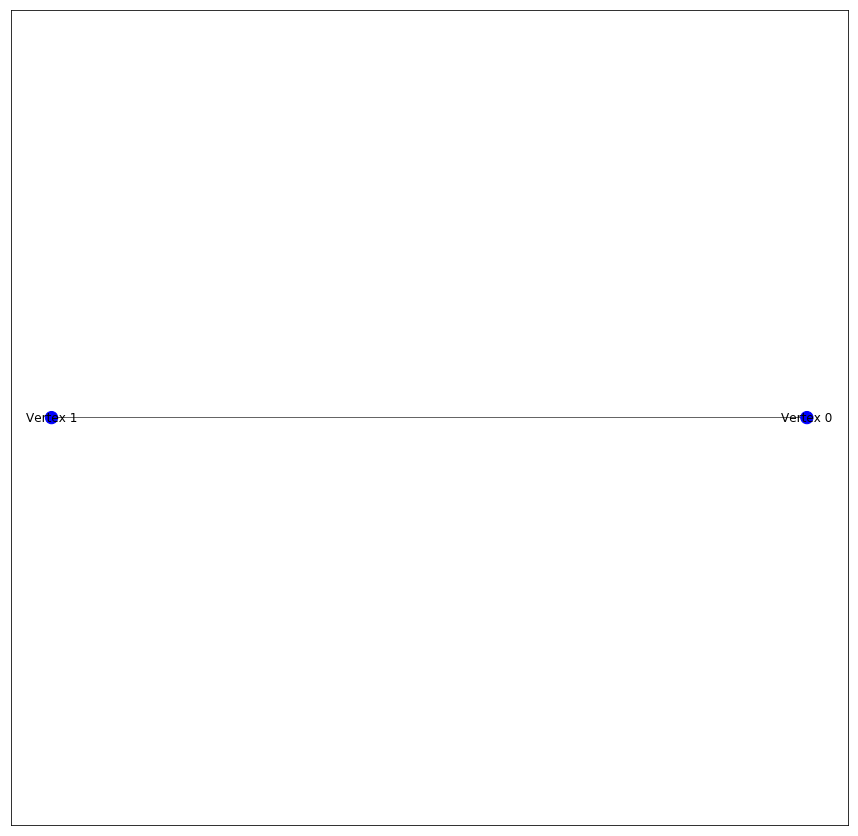

-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [], Vertex 2: [Vertex 0, Vertex 1]}
Vertex 0 degree 1
[(0.6666666666666666, 0.3333333333333333, -0.08333333333333331), (-0.6666666666666666, -0.3333333333333333, 0.08333333333333331)]
[0.4166666666666667, -0.4166666666666667]
[Vertex 2, (Vertex 2, Vertex 1)]
chose 0 (0.6666666666666666, 0.3333333333333333, -0.08333333333333331)
chosen vtx Vertex 2
chose to add
###########################
Vertex 1 degree 1
[(1.0, 0.3333333333333333, -0.09027777777777776), (-1.0, -0.3333333333333333, 0.08333333333333331)]
[0.5763888888888888, -0.5833333333333333]
[Vertex 2, (Vertex 2, Vertex 0)]
chose 0 (1.0, 0.3333333333333333, -0.09027777777777776)
chosen vtx Vertex 2
chose to add
###########################
Vertex 2 had no options


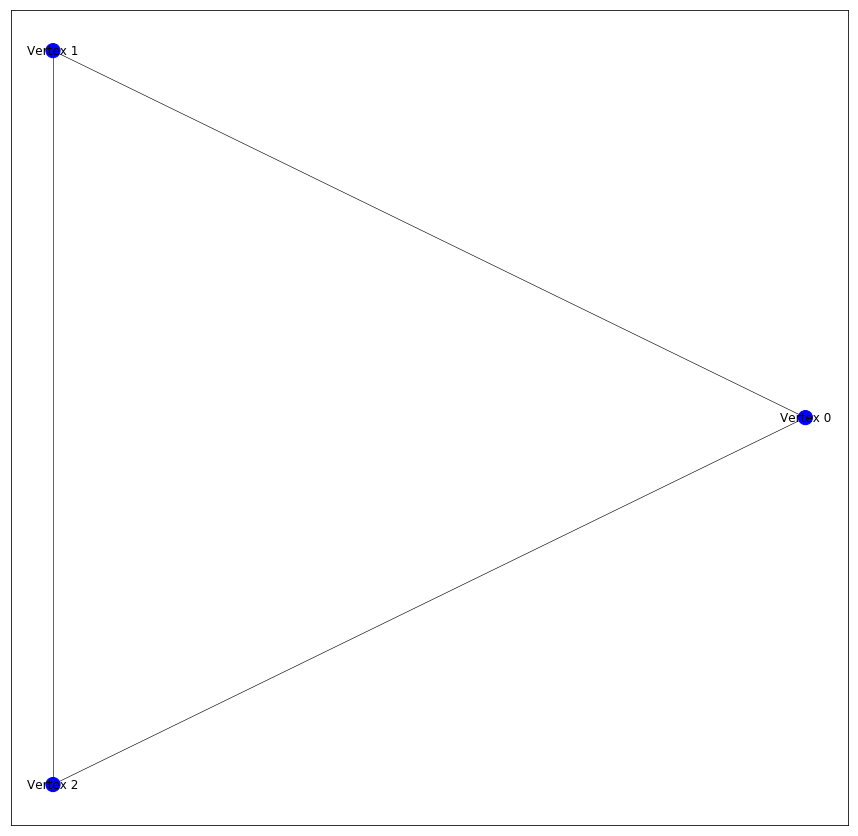

-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [], Vertex 2: [], Vertex 3: [Vertex 2, Vertex 0, Vertex 1]}
Vertex 0 degree 2
[(0.6666666666666665, 0.25, -0.08333333333333329), (-0.5, -0.25, 0.09027777777777776), (-0.75, -0.25, 0.09027777777777776)]
[0.375, -0.2847222222222222, -0.4097222222222222]
[Vertex 3, (Vertex 3, Vertex 2), (Vertex 3, Vertex 1)]
chose 0 (0.6666666666666665, 0.25, -0.08333333333333329)
chosen vtx Vertex 3
chose to add
###########################
Vertex 1 degree 2
[(1.0, 0.25, -0.09027777777777776), (-0.7499999999999999, -0.25, 0.09027777777777776), (-0.7499999999999999, -0.25, 0.09027777777777776)]
[0.5347222222222222, -0.4097222222222222, -0.4097222222222222]
[Vertex 3, (Vertex 3, Vertex 2), (Vertex 3, Vertex 0)]
chose 0 (1.0, 0.25, -0.09027777777777776)
chosen vtx Vertex 3
chose to add
###########################
Vertex 2 degree 2
[(0.6666666666666665, 0.25, -0.09722222222222218), (-0.4999999999999999, -0.25, 0.09027777777777776), 

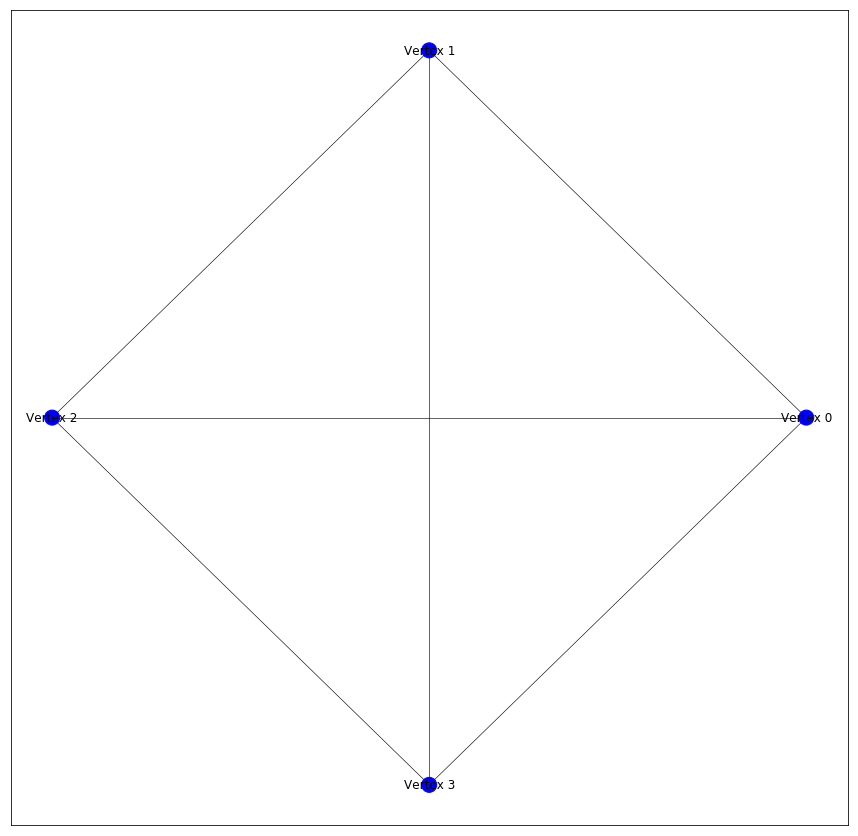

-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [], Vertex 2: [], Vertex 3: [], Vertex 4: [Vertex 2, Vertex 0, Vertex 3, Vertex 1]}
Vertex 0 degree 3
[(0.9999999999999998, 0.20000000000000007, -0.08333333333333331), (-0.5333333333333334, -0.19999999999999996, 0.09722222222222218), (-0.3999999999999998, -0.19999999999999996, 0.09722222222222218), (0.20000000000000018, -0.19999999999999996, 0.09722222222222218)]
[0.5166666666666666, -0.2694444444444445, -0.2027777777777777, 0.0972222222222223]
[Vertex 4, (Vertex 4, Vertex 3), (Vertex 4, Vertex 1), (Vertex 4, Vertex 2)]
chose 0 (0.9999999999999998, 0.20000000000000007, -0.08333333333333331)
chosen vtx Vertex 4
chose to add
###########################
Vertex 1 degree 3
[(0.6666666666666667, 0.20000000000000007, -0.09027777777777779), (-0.8, -0.19999999999999996, 0.09722222222222218), (-0.6666666666666664, -0.19999999999999996, 0.09722222222222218), (-0.6666666666666664, -0.19999999999999996, 0.0972222222222221

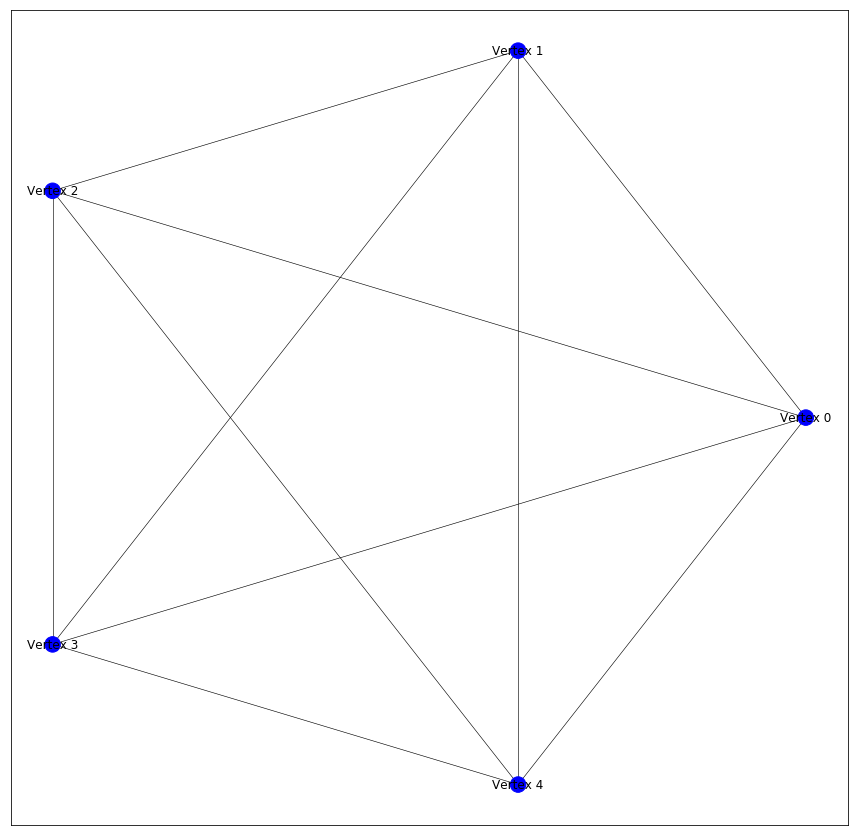

-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [], Vertex 2: [], Vertex 3: [], Vertex 4: [], Vertex 5: [Vertex 2, Vertex 3, Vertex 4, Vertex 1, Vertex 0]}
Vertex 0 degree 4
[(0.6666666666666666, 0.16666666666666674, -0.08333333333333331), (-0.8333333333333334, -0.16666666666666663, 0.10416666666666663), (-1.0, -0.16666666666666663, 0.10416666666666663), (-0.5555555555555557, -0.16666666666666663, 0.10416666666666663), (-0.44444444444444464, -0.16666666666666663, 0.10416666666666663)]
[0.33333333333333337, -0.39583333333333337, -0.47916666666666663, -0.25694444444444453, -0.201388888888889]
[Vertex 5, (Vertex 5, Vertex 4), (Vertex 5, Vertex 1), (Vertex 5, Vertex 2), (Vertex 5, Vertex 3)]
chose 0 (0.6666666666666666, 0.16666666666666674, -0.08333333333333331)
chosen vtx Vertex 5
chose to add
###########################
Vertex 1 degree 4
[(0.5, 0.16666666666666674, -0.09027777777777779), (-0.5555555555555557, -0.16666666666666663, 0.10416666666666663), (-0.8

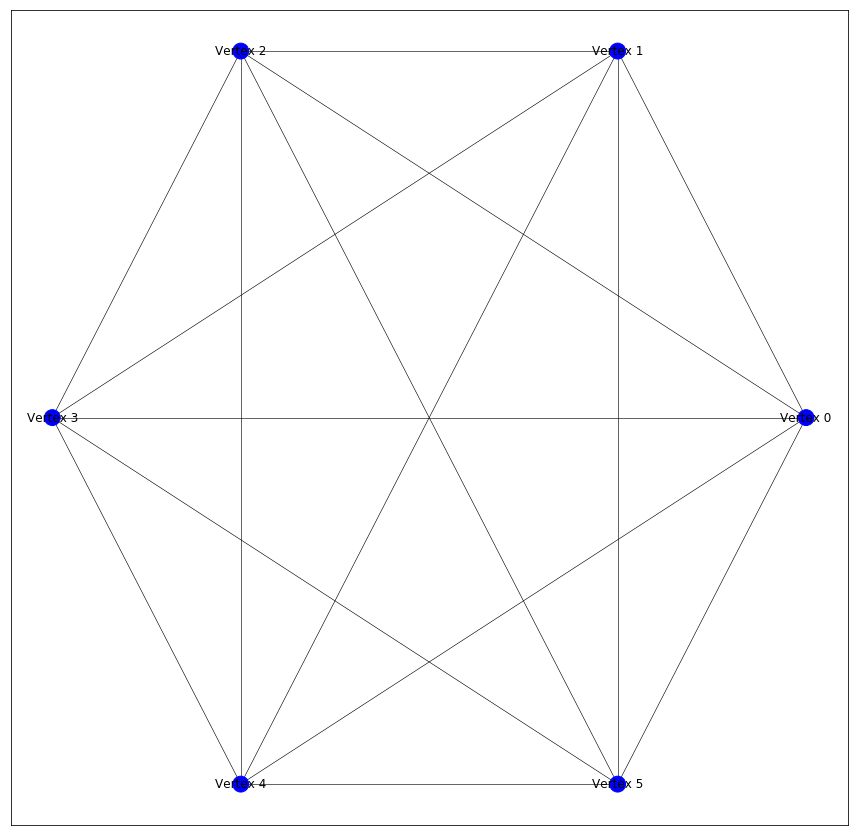

-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [], Vertex 2: [], Vertex 3: [], Vertex 4: [], Vertex 5: [], Vertex 6: [Vertex 5, Vertex 2, Vertex 3, Vertex 4, Vertex 1, Vertex 0]}
Vertex 0 degree 5
[(0.5, 0.1428571428571428, -0.08333333333333331), (-0.5714285714285714, -0.1428571428571429, 0.1111111111111111), (-0.7619047619047618, -0.1428571428571429, 0.1111111111111111), (-0.6666666666666663, -0.1428571428571429, 0.1111111111111111), (-0.5238095238095235, -0.1428571428571429, 0.1111111111111111), (-0.42857142857142805, -0.1428571428571429, 0.1111111111111111)]
[0.23809523809523808, -0.24603174603174605, -0.3412698412698412, -0.2936507936507935, -0.2222222222222221, -0.17460317460317437]
[Vertex 6, (Vertex 6, Vertex 5), (Vertex 6, Vertex 1), (Vertex 6, Vertex 2), (Vertex 6, Vertex 3), (Vertex 6, Vertex 4)]
chose 0 (0.5, 0.1428571428571428, -0.08333333333333331)
chosen vtx Vertex 6
chose to add
###########################
Vertex 1 degree 5
[(0.400000000000

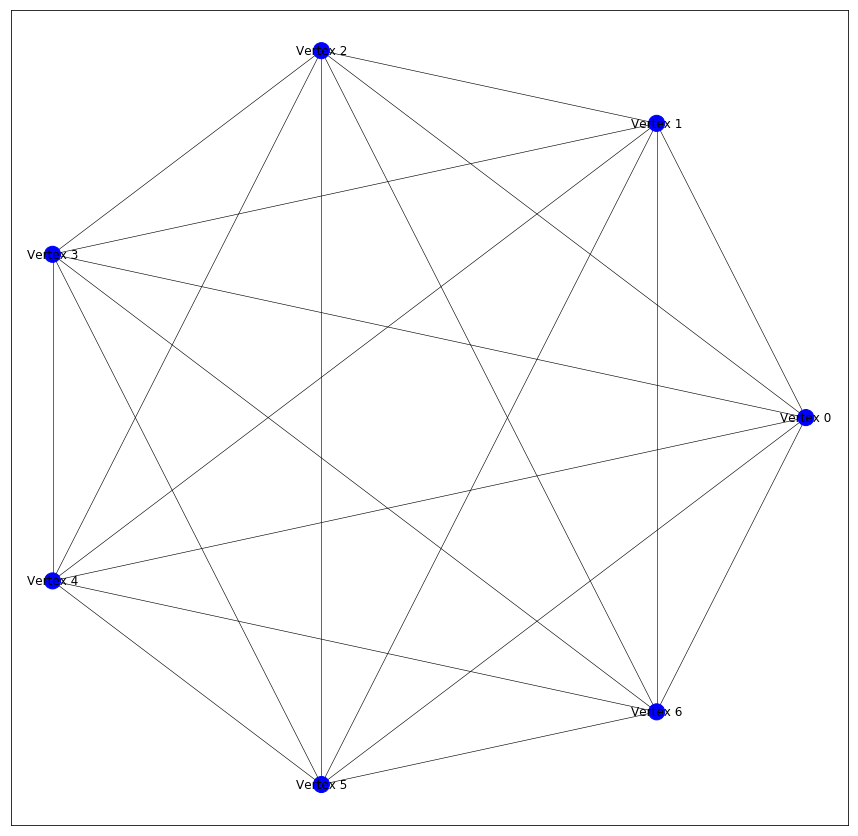

-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [], Vertex 2: [], Vertex 3: [], Vertex 4: [], Vertex 5: [], Vertex 6: [], Vertex 7: [Vertex 5, Vertex 6, Vertex 2, Vertex 4, Vertex 1, Vertex 0]}
Vertex 0 degree 6
[(0.3999999999999999, 0.125, -0.08333333333333337), (-0.4375, -0.125, 0.11805555555555552), (-0.6208333333333336, -0.125, 0.11805555555555552), (-0.829166666666667, -0.125, 0.11805555555555552), (-0.745833333333334, -0.125, 0.11805555555555552), (-0.5166666666666675, -0.125, 0.11805555555555552), (-0.433333333333334, -0.125, 0.11805555555555552)]
[0.17916666666666659, -0.16319444444444448, -0.25486111111111126, -0.359027777777778, -0.3173611111111115, -0.20277777777777822, -0.16111111111111148]
[Vertex 7, (Vertex 7, Vertex 6), (Vertex 7, Vertex 1), (Vertex 7, Vertex 2), (Vertex 7, Vertex 3), (Vertex 7, Vertex 4), (Vertex 7, Vertex 5)]
chose 0 (0.3999999999999999, 0.125, -0.08333333333333337)
chosen vtx Vertex 7
chose to add
########################

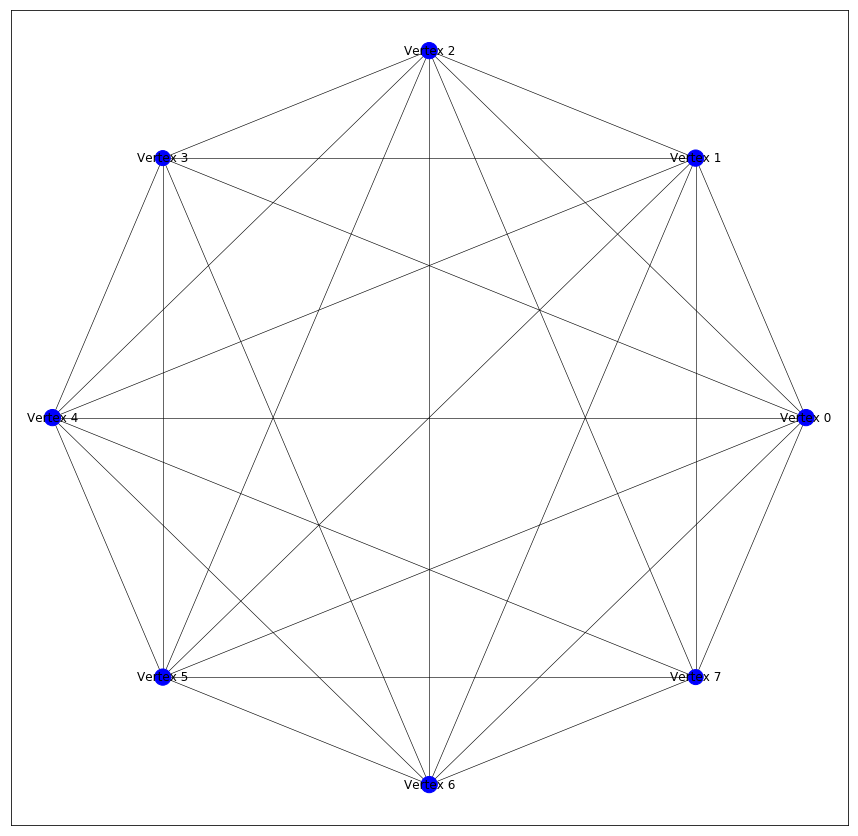

-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [], Vertex 2: [], Vertex 3: [], Vertex 4: [], Vertex 5: [], Vertex 6: [], Vertex 7: [], Vertex 8: [Vertex 6, Vertex 2, Vertex 3, Vertex 1, Vertex 0]}
Vertex 0 degree 7
[(0.3333333333333333, 0.11111111111111105, -0.08333333333333326), (-0.5925925925925924, -0.11111111111111116, 0.11805555555555558), (-0.44814814814814796, -0.11111111111111116, 0.11805555555555558), (-0.5407407407407404, -0.11111111111111116, 0.125), (-0.4666666666666662, -0.11111111111111116, 0.125), (-0.3925925925925924, -0.11111111111111116, 0.125), (-0.3185185185185182, -0.11111111111111116, 0.125), (-0.007407407407406986, -0.11111111111111116, 0.125)]
[0.13888888888888892, -0.23379629629629622, -0.16157407407407398, -0.20092592592592579, -0.16388888888888864, -0.12685185185185177, -0.08981481481481468, 0.06574074074074093]
[Vertex 8, (Vertex 8, Vertex 3), (Vertex 8, Vertex 7), (Vertex 8, Vertex 1), (Vertex 8, Vertex 2), (Vertex 8, Vertex 4

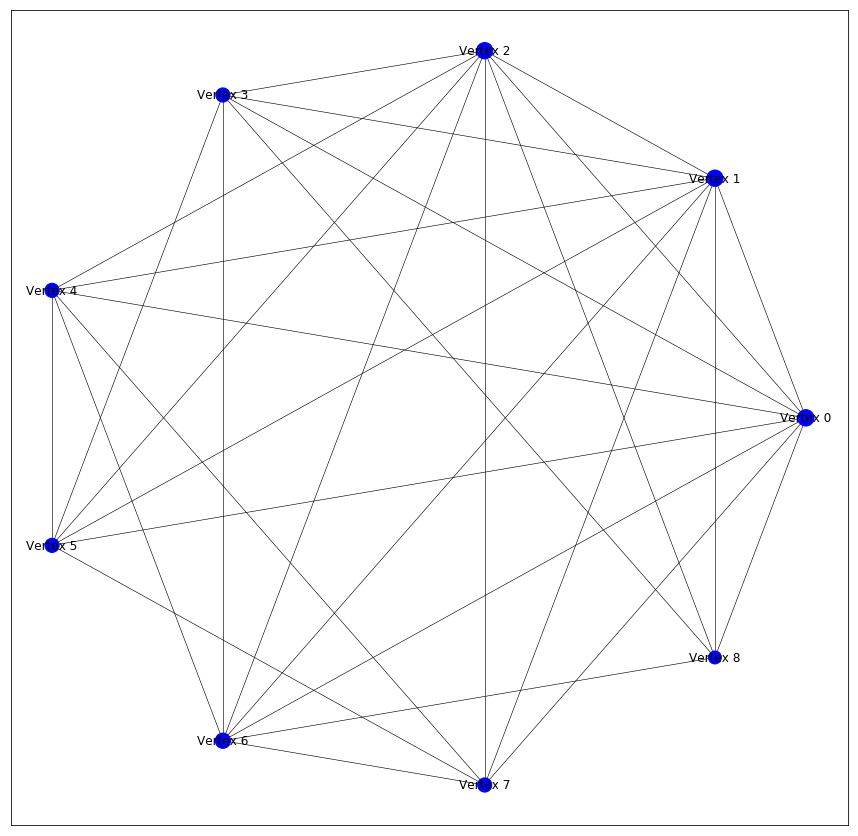

-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [], Vertex 2: [], Vertex 3: [Vertex 7, Vertex 4], Vertex 4: [], Vertex 5: [], Vertex 6: [], Vertex 7: [], Vertex 8: [Vertex 7], Vertex 9: [Vertex 6, Vertex 2, Vertex 8, Vertex 3, Vertex 1, Vertex 0]}
Vertex 0 degree 8
[(0.2857142857142854, 0.09999999999999998, -0.08333333333333326), (-0.45, -0.10000000000000009, 0.11805555555555547), (-0.55, -0.10000000000000009, 0.11805555555555547), (-0.65, -0.10000000000000009, 0.11805555555555547), (-0.55, -0.10000000000000009, 0.11111111111111094), (-0.65, -0.10000000000000009, 0.1319444444444443), (-0.75, -0.10000000000000009, 0.1319444444444443), (-0.7, -0.10000000000000009, 0.11805555555555547), (-0.65, -0.10000000000000009, 0.12499999999999989)]
[0.10952380952380944, -0.15694444444444455, -0.2069444444444446, -0.2569444444444446, -0.21388888888888913, -0.24305555555555575, -0.29305555555555574, -0.28194444444444455, -0.25000000000000017]
[Vertex 9, (Vertex 9, Vertex 

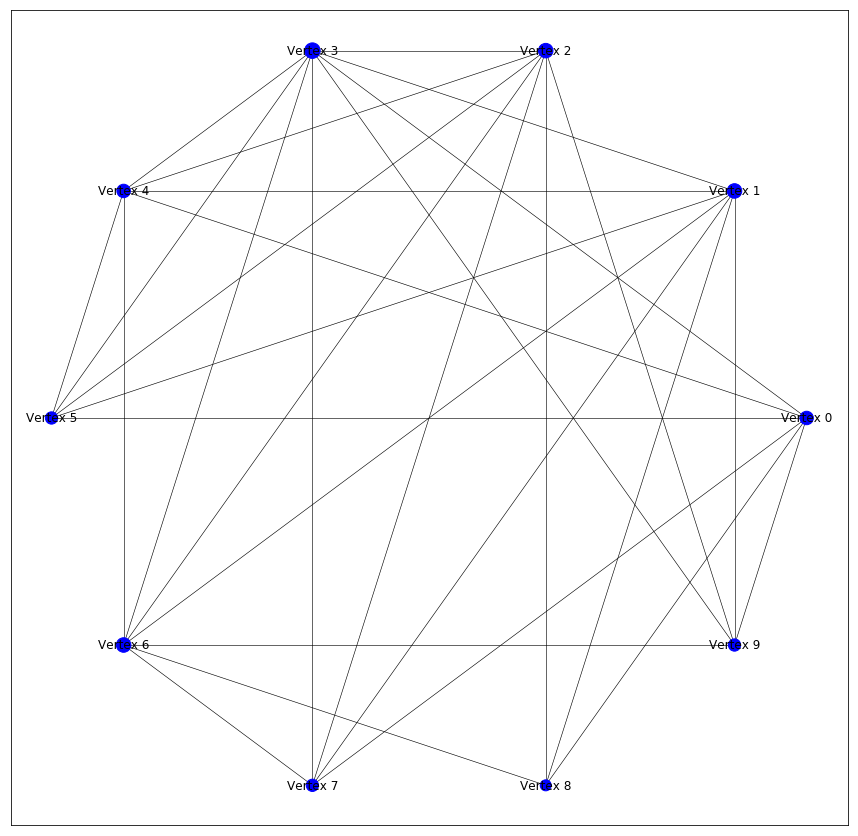

-----------------------------------------
proposals: {Vertex 0: [Vertex 2], Vertex 1: [Vertex 0], Vertex 2: [], Vertex 3: [], Vertex 4: [], Vertex 5: [Vertex 6], Vertex 6: [Vertex 0], Vertex 7: [Vertex 5, Vertex 4], Vertex 8: [Vertex 5, Vertex 4], Vertex 9: [Vertex 8], Vertex 10: [Vertex 5, Vertex 0, Vertex 9, Vertex 2, Vertex 3, Vertex 8]}
Vertex 0 degree 6
[(0.5000000000000003, 0.09090909090909094, -0.125), (-0.36363636363636365, -0.09090909090909088, 0.09722222222222221), (-0.22337662337662356, -0.09090909090909088, 0.09027777777777773), (-0.27792207792207824, -0.09090909090909088, 0.1111111111111111), (-0.23246753246753246, -0.09090909090909088, 0.09722222222222221), (-0.2870129870129868, -0.09090909090909088, 0.09027777777777773), (-0.24155844155844133, -0.09090909090909088, 0.08333333333333331), (0.6584415584415585, 0.09090909090909094, -0.11805555555555558), (-0.24155844155844133, -0.09090909090909088, 0.09722222222222221), (-0.24155844155844133, -0.09090909090909088, 0.09027777

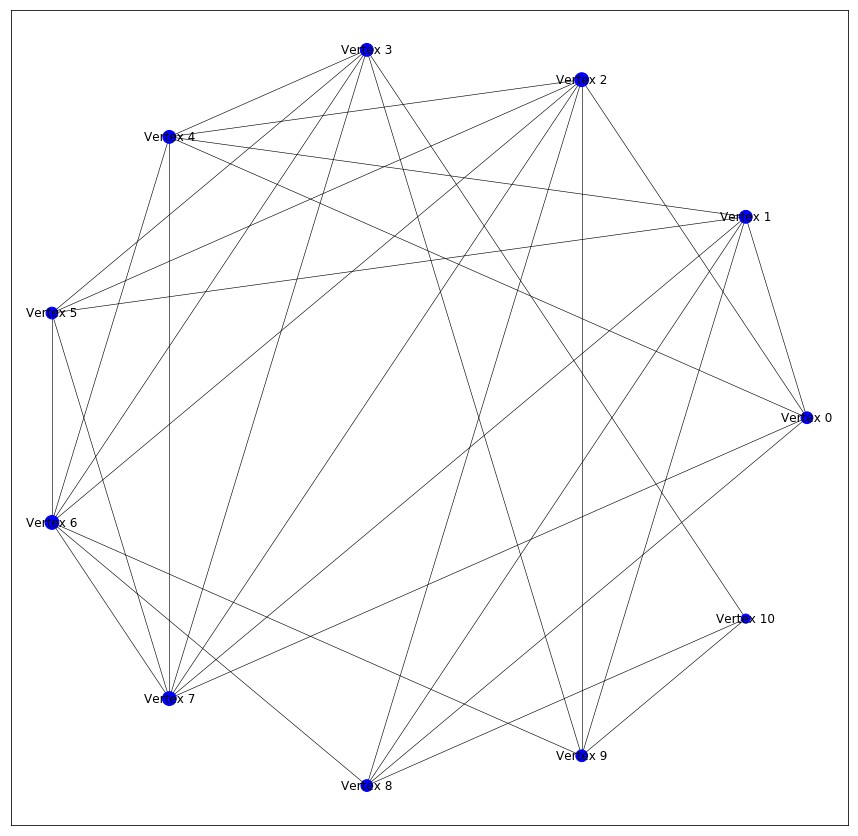

-----------------------------------------
proposals: {Vertex 0: [Vertex 10, Vertex 9], Vertex 1: [Vertex 3, Vertex 10], Vertex 2: [Vertex 3], Vertex 3: [Vertex 8, Vertex 1, Vertex 0], Vertex 4: [], Vertex 5: [Vertex 9, Vertex 10], Vertex 6: [Vertex 1], Vertex 7: [Vertex 8], Vertex 8: [Vertex 4], Vertex 9: [Vertex 5, Vertex 8, Vertex 0], Vertex 10: [Vertex 6, Vertex 7], Vertex 11: [Vertex 5, Vertex 6, Vertex 7, Vertex 9, Vertex 2, Vertex 3, Vertex 4, Vertex 1, Vertex 8]}
Vertex 0 degree 5
[(0.4000000000000001, 0.08333333333333331, -0.09722222222222221), (-0.45833333333333304, -0.08333333333333337, 0.10416666666666663), (-0.5166666666666663, -0.08333333333333337, 0.10416666666666663), (-0.6416666666666663, -0.08333333333333337, 0.10416666666666663), (-0.6083333333333331, -0.08333333333333337, 0.10416666666666663), (-0.5749999999999996, -0.08333333333333337, 0.09722222222222221), (0.1583333333333338, 0.08333333333333331, -0.09722222222222221), (-0.5749999999999996, -0.08333333333333337, 0

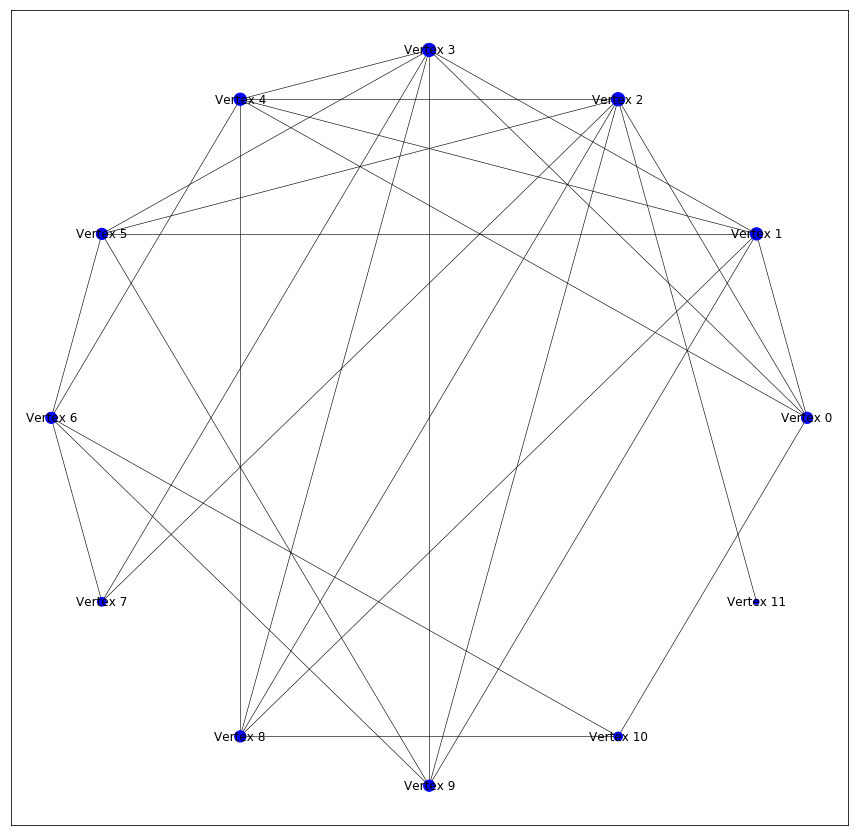

-----------------------------------------
proposals: {Vertex 0: [Vertex 5, Vertex 6, Vertex 8], Vertex 1: [Vertex 6, Vertex 7, Vertex 2], Vertex 2: [Vertex 6, Vertex 10, Vertex 3], Vertex 3: [], Vertex 4: [Vertex 5], Vertex 5: [Vertex 4, Vertex 0], Vertex 6: [Vertex 2, Vertex 3, Vertex 8], Vertex 7: [Vertex 5, Vertex 9, Vertex 4, Vertex 1, Vertex 0], Vertex 8: [Vertex 0], Vertex 9: [Vertex 7, Vertex 4, Vertex 0], Vertex 10: [Vertex 9, Vertex 2, Vertex 4, Vertex 1], Vertex 11: [Vertex 9, Vertex 3, Vertex 4, Vertex 0], Vertex 12: [Vertex 6, Vertex 9, Vertex 10, Vertex 8, Vertex 4, Vertex 1, Vertex 0]}
Vertex 0 degree 5
[(0.33333333333333326, 0.08333333333333331, -0.10416666666666657), (-0.307692307692308, -0.08333333333333326, 0.09722222222222221), (-0.34358974358974403, -0.08333333333333326, 0.09027777777777779), (-0.3128205128205131, -0.08333333333333326, 0.09722222222222221), (-0.28205128205128244, -0.08333333333333326, 0.10416666666666669), (-0.2512820512820515, -0.08333333333333326,

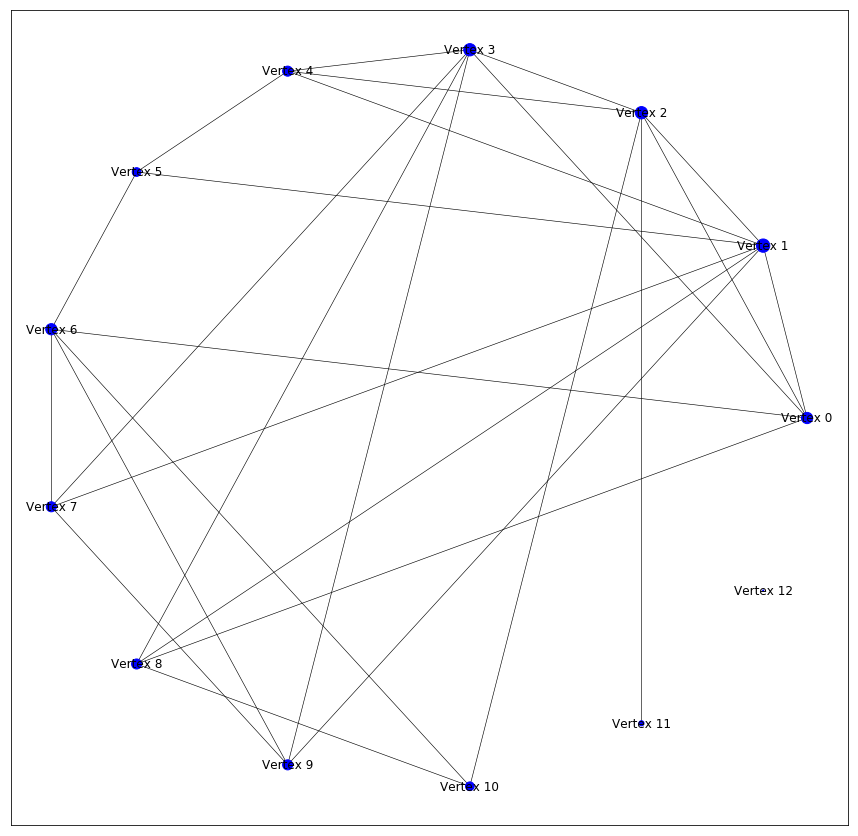

-----------------------------------------
proposals: {Vertex 0: [Vertex 5, Vertex 7, Vertex 9, Vertex 4], Vertex 1: [], Vertex 2: [Vertex 5, Vertex 6, Vertex 7, Vertex 9], Vertex 3: [Vertex 5, Vertex 6, Vertex 1], Vertex 4: [Vertex 0, Vertex 10, Vertex 9, Vertex 8], Vertex 5: [Vertex 7, Vertex 2, Vertex 0], Vertex 6: [Vertex 2, Vertex 3, Vertex 1, Vertex 8], Vertex 7: [Vertex 5, Vertex 2, Vertex 4, Vertex 0, Vertex 11], Vertex 8: [Vertex 5, Vertex 6, Vertex 7, Vertex 9, Vertex 2], Vertex 9: [Vertex 4, Vertex 0], Vertex 10: [Vertex 3, Vertex 4, Vertex 1, Vertex 0], Vertex 11: [Vertex 7, Vertex 0, Vertex 3], Vertex 12: [Vertex 6], Vertex 13: [Vertex 5, Vertex 6, Vertex 7, Vertex 9, Vertex 3, Vertex 8]}
Vertex 0 degree 5
[(0.4000000000000001, 0.08333333333333331, -0.10416666666666657), (-0.3095238095238094, -0.08333333333333326, 0.09722222222222221), (-0.3476190476190474, -0.08333333333333326, 0.09722222222222221), (-0.3190476190476192, -0.08333333333333326, 0.09722222222222221), (-0.2904

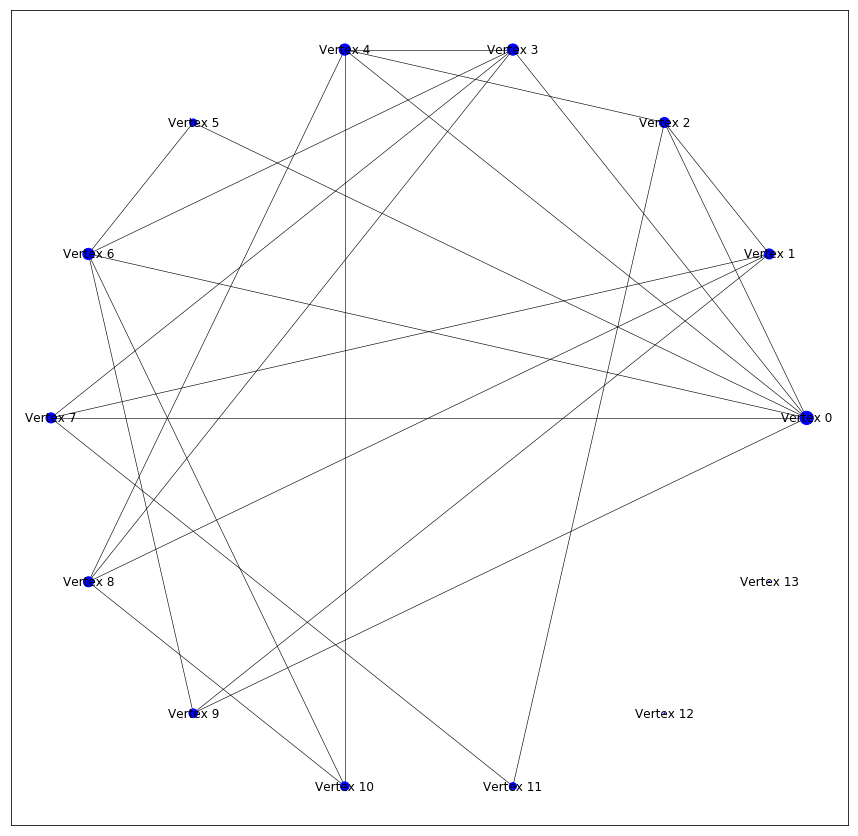

-----------------------------------------
proposals: {Vertex 0: [], Vertex 1: [Vertex 4, Vertex 0, Vertex 11], Vertex 2: [Vertex 7, Vertex 10, Vertex 8], Vertex 3: [Vertex 5, Vertex 10], Vertex 4: [], Vertex 5: [Vertex 9, Vertex 3, Vertex 1, Vertex 8], Vertex 6: [Vertex 4, Vertex 8], Vertex 7: [Vertex 6, Vertex 9, Vertex 10, Vertex 4], Vertex 8: [Vertex 7, Vertex 2, Vertex 0, Vertex 11], Vertex 9: [Vertex 2, Vertex 8, Vertex 3], Vertex 10: [Vertex 2, Vertex 3, Vertex 0, Vertex 11], Vertex 11: [Vertex 5, Vertex 6, Vertex 3, Vertex 4, Vertex 0], Vertex 12: [Vertex 7], Vertex 13: [Vertex 2], Vertex 14: [Vertex 6, Vertex 10, Vertex 2, Vertex 3, Vertex 4, Vertex 0, Vertex 11]}
Vertex 0 degree 7
[(0.3333333333333333, 0.08333333333333337, -0.10416666666666663), (-0.37333333333333274, -0.08333333333333331, 0.09027777777777779), (-0.3466666666666664, -0.08333333333333331, 0.10416666666666663), (-0.3199999999999998, -0.08333333333333331, 0.09722222222222221), (-0.23111111111111077, -0.0833333333

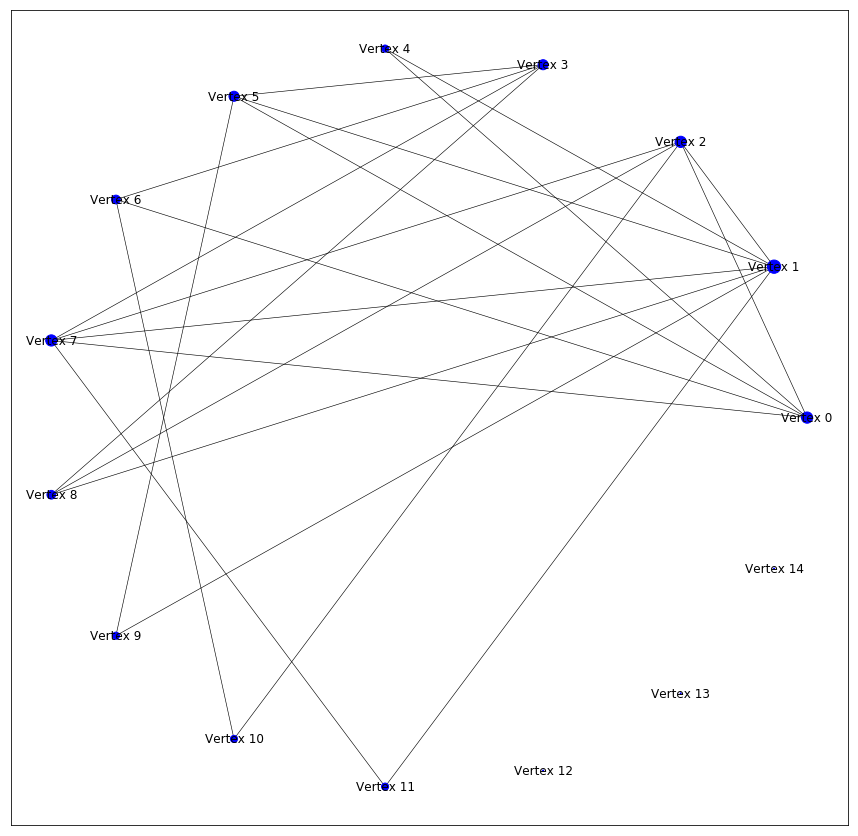

-----------------------------------------
proposals: {Vertex 0: [Vertex 1, Vertex 8], Vertex 1: [Vertex 0], Vertex 2: [Vertex 5, Vertex 3, Vertex 11], Vertex 3: [Vertex 9, Vertex 1, Vertex 0], Vertex 4: [Vertex 6, Vertex 2, Vertex 7], Vertex 5: [Vertex 6, Vertex 10, Vertex 2, Vertex 8], Vertex 6: [Vertex 7, Vertex 2, Vertex 8], Vertex 7: [Vertex 6, Vertex 10, Vertex 4], Vertex 8: [Vertex 6, Vertex 7, Vertex 4, Vertex 0], Vertex 9: [Vertex 7, Vertex 11], Vertex 10: [Vertex 3, Vertex 4, Vertex 1, Vertex 0], Vertex 11: [Vertex 5, Vertex 8, Vertex 3, Vertex 4, Vertex 0], Vertex 12: [Vertex 0], Vertex 13: [Vertex 3], Vertex 14: [Vertex 3], Vertex 15: [Vertex 7, Vertex 2, Vertex 4, Vertex 1, Vertex 0]}
Vertex 0 degree 5
[(0.3333333333333335, 0.08333333333333331, -0.1111111111111111), (-0.375, -0.08333333333333326, 0.09027777777777773), (-0.3500000000000001, -0.08333333333333326, 0.08333333333333331), (-0.2625000000000002, -0.08333333333333326, 0.08333333333333331), (-0.3041666666666667, -0.0

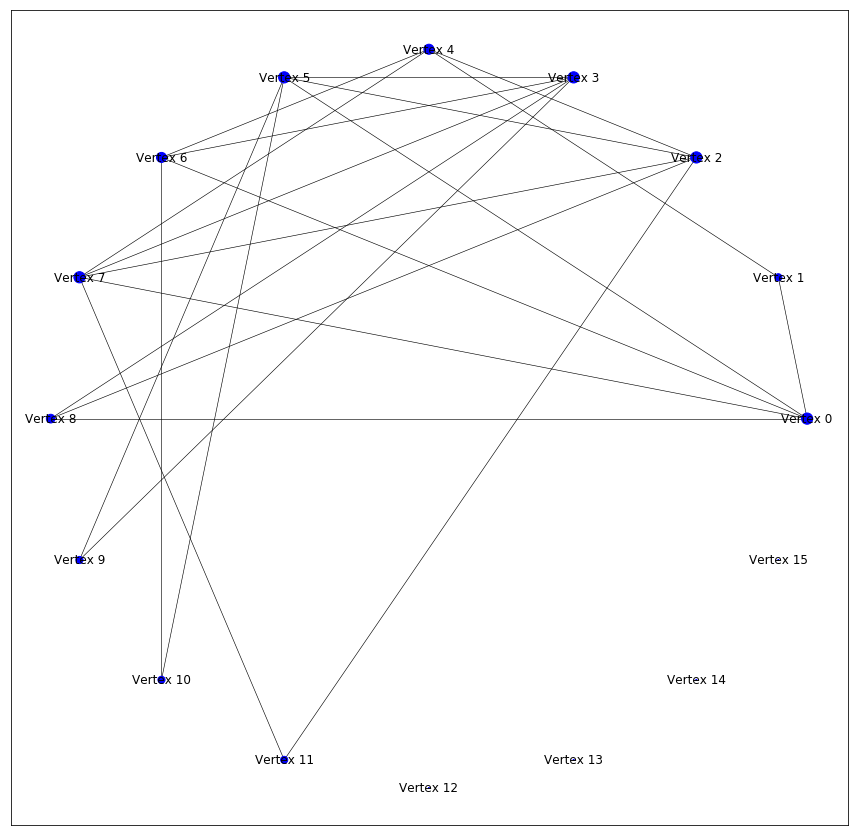

-----------------------------------------
proposals: {Vertex 0: [Vertex 10, Vertex 2, Vertex 3], Vertex 1: [Vertex 5, Vertex 9, Vertex 3, Vertex 8], Vertex 2: [], Vertex 3: [Vertex 1, Vertex 0], Vertex 4: [Vertex 5, Vertex 0, Vertex 3, Vertex 8], Vertex 5: [Vertex 7, Vertex 8], Vertex 6: [Vertex 5], Vertex 7: [Vertex 5, Vertex 8, Vertex 1], Vertex 8: [Vertex 6, Vertex 7, Vertex 9], Vertex 9: [Vertex 6, Vertex 7, Vertex 2, Vertex 4, Vertex 11], Vertex 10: [Vertex 2, Vertex 3, Vertex 8, Vertex 11], Vertex 11: [Vertex 5, Vertex 6, Vertex 10, Vertex 9, Vertex 3, Vertex 0], Vertex 12: [Vertex 11], Vertex 13: [Vertex 5], Vertex 14: [Vertex 11], Vertex 15: [Vertex 12], Vertex 16: [Vertex 12]}
Vertex 0 degree 5
[(0.39999999999999986, 0.08333333333333331, -0.1111111111111111), (-0.3137254901960786, -0.08333333333333326, 0.08333333333333331), (-0.2941176470588233, -0.08333333333333326, 0.08333333333333331), (-0.33725490196078417, -0.08333333333333326, 0.08333333333333331), (-0.31372549019607837,

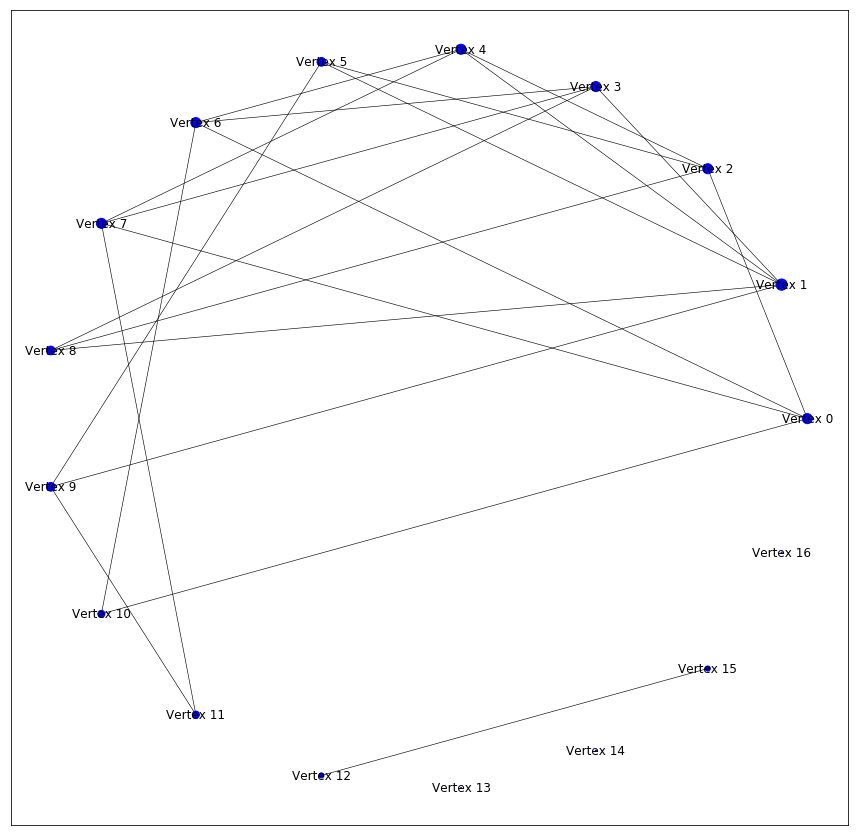

-----------------------------------------
proposals: {Vertex 0: [Vertex 5, Vertex 9, Vertex 3, Vertex 1, Vertex 8], Vertex 1: [Vertex 6, Vertex 0, Vertex 10, Vertex 2], Vertex 2: [Vertex 9, Vertex 1], Vertex 3: [Vertex 5, Vertex 9, Vertex 2, Vertex 11], Vertex 4: [Vertex 10, Vertex 3, Vertex 8], Vertex 5: [Vertex 4, Vertex 7], Vertex 6: [Vertex 2], Vertex 7: [Vertex 5, Vertex 6, Vertex 9, Vertex 2, Vertex 1], Vertex 8: [Vertex 5, Vertex 9, Vertex 4], Vertex 9: [Vertex 6, Vertex 4, Vertex 3], Vertex 10: [Vertex 7, Vertex 2, Vertex 8, Vertex 3, Vertex 4, Vertex 1], Vertex 11: [Vertex 5, Vertex 6, Vertex 2, Vertex 3, Vertex 4, Vertex 1], Vertex 12: [], Vertex 13: [Vertex 4], Vertex 14: [Vertex 11], Vertex 15: [], Vertex 16: [Vertex 3]}
Vertex 0 degree 4
[(0.3333333333333334, 0.08333333333333326, -0.08333333333333331), (-0.4, -0.08333333333333334, 0.08333333333333331), (-0.4, -0.08333333333333334, 0.09027777777777773), (-0.4, -0.08333333333333334, 0.08333333333333331), (-0.4, -0.0833333333

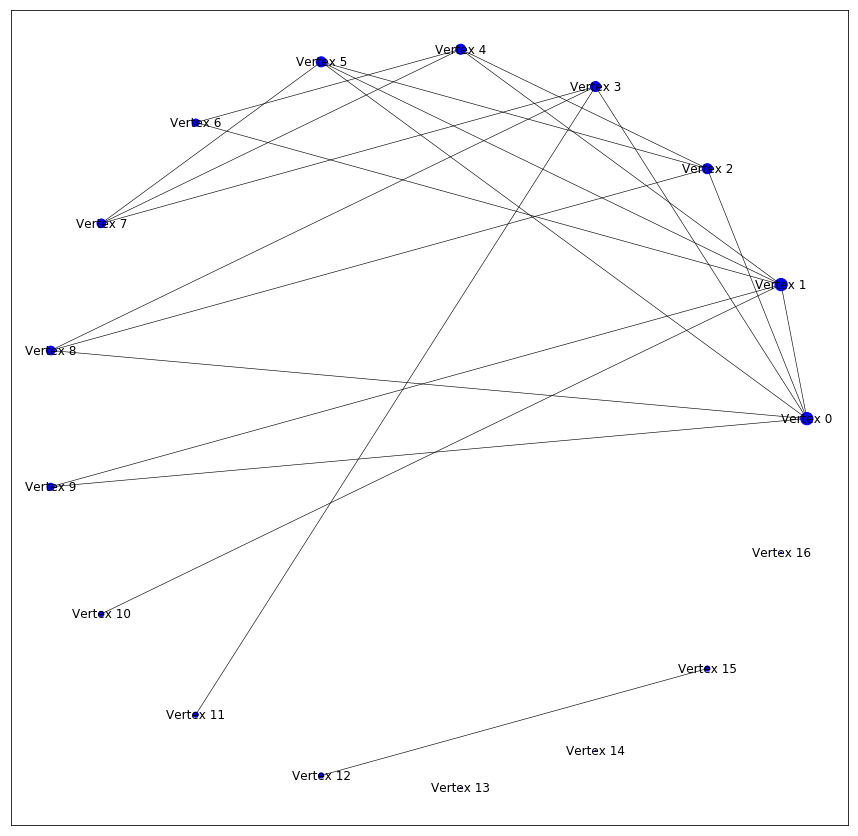

-----------------------------------------
proposals: {Vertex 0: [Vertex 6, Vertex 10], Vertex 1: [Vertex 2], Vertex 2: [Vertex 7, Vertex 3], Vertex 3: [Vertex 5, Vertex 1], Vertex 4: [Vertex 5, Vertex 3, Vertex 0], Vertex 5: [Vertex 9, Vertex 4, Vertex 8], Vertex 6: [Vertex 5, Vertex 7], Vertex 7: [Vertex 2, Vertex 1, Vertex 0], Vertex 8: [Vertex 10, Vertex 1], Vertex 9: [Vertex 5, Vertex 10, Vertex 2, Vertex 8], Vertex 10: [Vertex 5, Vertex 6, Vertex 7, Vertex 4], Vertex 11: [Vertex 5, Vertex 7, Vertex 2, Vertex 8, Vertex 0], Vertex 12: [], Vertex 13: [Vertex 2], Vertex 14: [Vertex 1], Vertex 15: [], Vertex 16: [Vertex 7]}
Vertex 0 degree 6
[(0.39999999999999986, 0.08333333333333331, -0.09722222222222221), (-0.3333333333333332, -0.08333333333333331, 0.09722222222222221), (-0.39999999999999986, -0.08333333333333331, 0.09722222222222221), (-0.39999999999999986, -0.08333333333333331, 0.09027777777777773), (-0.3333333333333332, -0.08333333333333331, 0.09722222222222221), (-0.3999999999999

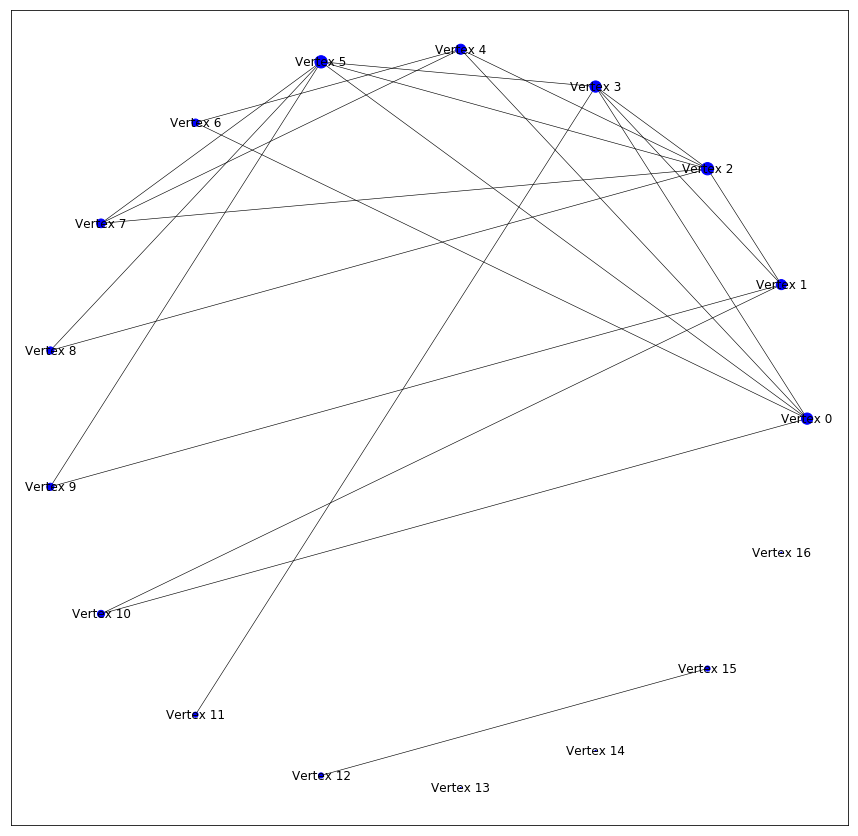

-----------------------------------------
proposals: {Vertex 0: [Vertex 7, Vertex 9, Vertex 2, Vertex 1], Vertex 1: [Vertex 5, Vertex 8], Vertex 2: [Vertex 0], Vertex 3: [Vertex 10, Vertex 9, Vertex 4], Vertex 4: [Vertex 5, Vertex 9, Vertex 3, Vertex 8], Vertex 5: [Vertex 10, Vertex 1], Vertex 6: [Vertex 5, Vertex 7, Vertex 2, Vertex 3, Vertex 8], Vertex 7: [Vertex 0, Vertex 3, Vertex 8], Vertex 8: [Vertex 4], Vertex 9: [Vertex 10, Vertex 2, Vertex 3, Vertex 8], Vertex 10: [Vertex 5, Vertex 7, Vertex 9, Vertex 2], Vertex 11: [Vertex 5, Vertex 6, Vertex 10, Vertex 0], Vertex 12: [], Vertex 13: [Vertex 8], Vertex 14: [Vertex 8], Vertex 15: [], Vertex 16: [Vertex 15]}
Vertex 0 degree 5
[(0.39999999999999986, 0.08333333333333331, -0.10416666666666663), (-0.4, -0.08333333333333326, 0.09027777777777779), (-0.4, -0.08333333333333326, 0.09027777777777779), (-0.3333333333333334, -0.08333333333333326, 0.09027777777777779), (-0.4, -0.08333333333333326, 0.09027777777777779), (-0.4, -0.083333333333

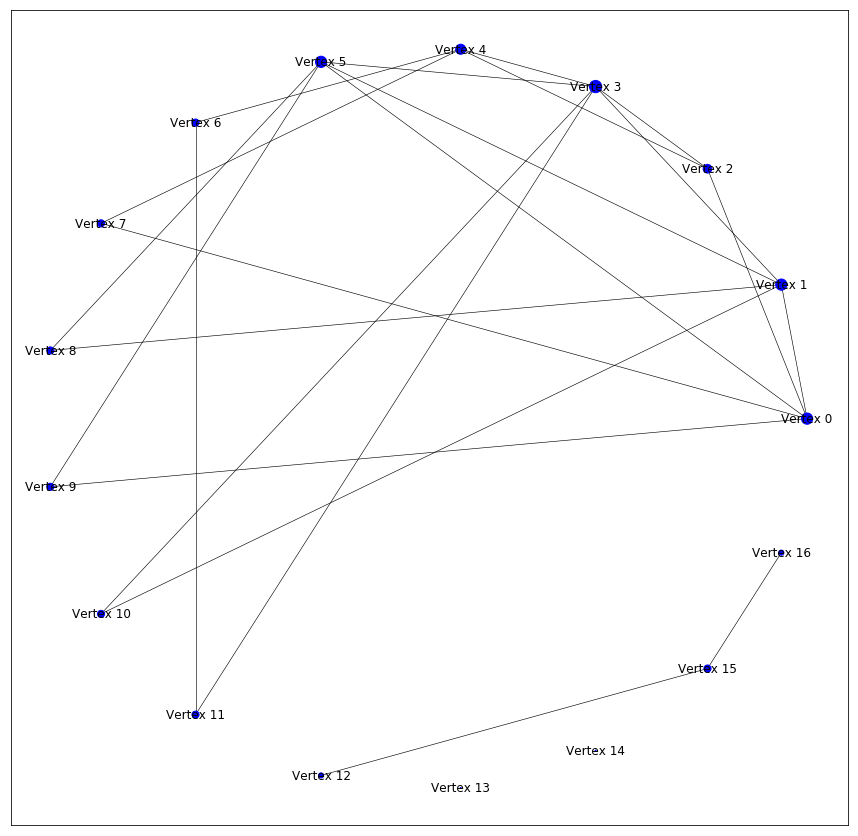

Largest component size: 12
graph density: 0.16176470588235295, 

average path length: 1.9696969696969697, 

diameter: 4, 

second eigenvalue: (1.2015995081760071+0j) 

-----------------------------------------
proposals: {Vertex 0: [Vertex 6, Vertex 4], Vertex 1: [Vertex 7, Vertex 2, Vertex 4], Vertex 2: [Vertex 5, Vertex 10], Vertex 3: [Vertex 6, Vertex 0], Vertex 4: [Vertex 5, Vertex 0], Vertex 5: [Vertex 10], Vertex 6: [Vertex 5, Vertex 9, Vertex 3], Vertex 7: [Vertex 2, Vertex 1], Vertex 8: [Vertex 6, Vertex 10, Vertex 3, Vertex 4, Vertex 11], Vertex 9: [Vertex 6, Vertex 2, Vertex 3, Vertex 4], Vertex 10: [Vertex 5, Vertex 8], Vertex 11: [Vertex 10, Vertex 4, Vertex 1], Vertex 12: [Vertex 16], Vertex 13: [Vertex 3], Vertex 14: [Vertex 5], Vertex 15: [], Vertex 16: [Vertex 12]}
Vertex 0 degree 5
[(0.39999999999999986, 0.08333333333333331, -0.10416666666666663), (-0.3333333333333334, -0.08333333333333326, 0.09027777777777779), (-0.4, -0.08333333333333326, 0.08333333333333331), (-0.33

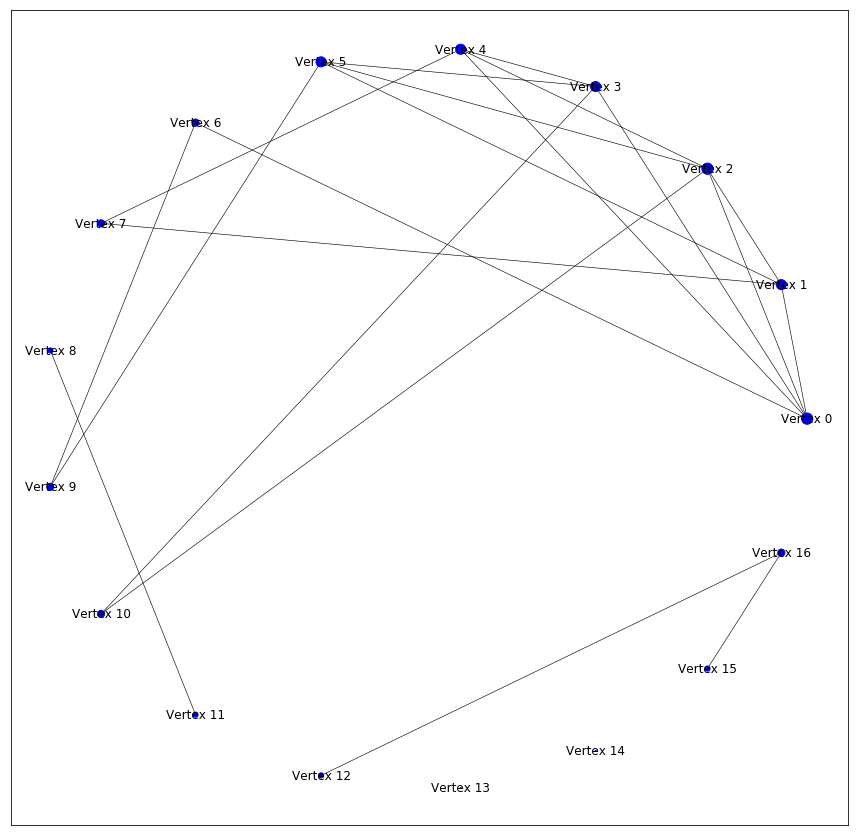

Largest component size: 10
graph density: 0.14705882352941177, 

average path length: 1.7555555555555555, 

diameter: 3, 

second eigenvalue: (1.063219139654176+0j) 



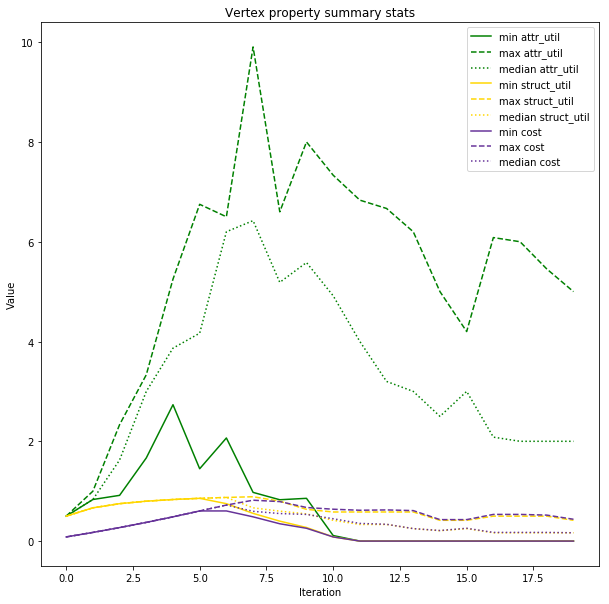

In [5]:
G = attribute_network(_N, params)
print(G.sim_params)

# Simul + some vis parameters
num_iters = 20
add_to_iter = 16
show_last = 2

summary_stat_vals = ['attr_util', 'struct_util', 'cost']
summary_funcs = [ min, max, np.median ]
summary_func_names = ['min', 'max', 'median']
summary_stats = { val : { name : [] for name in summary_func_names } \
                 for val in summary_stat_vals }
stat_val_colors = ['green', 'gold', 'rebeccapurple']
summary_func_styles = ['-', '--', ':']

for it in range(num_iters):
    if it < add_to_iter:
        add_attr_graph_vtx(G)
    calc_edges(G)
    simul_random_walk(G)
    for v in [ v for v in G.vertices if v.degree == 0 ]:
        attr_util.indep_context_proposal(G, v)
        
    # Sim iter end, start stat collection
    
    attr_util_vals = [ u.total_edge_util / G.sim_params['edge_util_func'](u, u, G) \
                      for u in G.vertices ]
    struct_util_vals = [ u.data['struct_util'](u, G) for u in G.vertices ]
    costs = [ attr_util.calc_cost(u, G) for u in G.vertices ]
    values = [attr_util_vals, struct_util_vals, costs]
    
    for si in range(len(summary_stat_vals)):
        for fi in range(len(summary_funcs)):
            ss_val = summary_funcs[fi](values[si])
            summary_stats[summary_stat_vals[si]][summary_func_names[fi]].append(ss_val)
            
    if it >= num_iters - show_last:
        vis.draw_graph(G)
        print_metrics(G)

plt.figure(figsize=(10,10))
x_vals = list(range(num_iters))
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Vertex property summary stats")
for si in range(len(stat_val_colors)):
    for fi in range(len(summary_func_styles)):
        plt.plot(x_vals,
                 summary_stats[summary_stat_vals[si]][summary_func_names[fi]],
                 color=stat_val_colors[si],
                 linestyle=summary_func_styles[fi],
                 label='{0} {1}'.format(summary_func_names[fi], summary_stat_vals[si]))
plt.legend()
plt.show()